In [53]:
# give me a code that extracts from each sub-directory in a given directory, the data within a specified file:

import os
import numpy as np
from conditional_rate_matching import results_path
import ast
import matplotlib.pyplot as plt



def extract_data(directory, file):
    
    dicts_fashion_uniform = []
    dicts_fashion_OTl2 = []
    dicts_fashion_OTlog = []

    dicts_noise_uniform = []
    dicts_noise_OTl2 = []
    dicts_noise_OTlog = []

    dicts_emnist_uniform = []
    dicts_emnist_OTl2 = []
    dicts_emnist_OTlog = []

    for sub_dir in os.listdir(directory):
        file_path = os.path.join(directory, sub_dir, file)
        if os.path.exists(file_path):
            with open(file_path, 'r') as f:
                dict_str = f.read()
                d = ast.literal_eval(dict_str)
                run = sub_dir.split('_')
                d['source']=run[0]
                d['target']=run[2]
                for i, k in enumerate(run):
                    if 'gamma' in k: d['gamma'] = float(run[i+1])
                    if 'max' in k: d['max'] = float(run[i+1])
                    if 'Thermos' in k: 
                        d['Thermostat'] = k.split('Thermos')[0]

                d['run'] = sub_dir

                if d['source']=='fashion':
                    if 'OTl2' in sub_dir: dicts_fashion_OTl2.append(d)
                    elif 'OTlog' in sub_dir: dicts_fashion_OTlog.append(d)
                    else: dicts_fashion_uniform.append(d)
                if d['source']=='noise':
                    if 'OTl2' in sub_dir: dicts_noise_OTl2.append(d)
                    elif 'OTlog' in sub_dir: dicts_noise_OTlog.append(d)
                    else: dicts_noise_uniform.append(d)
                if d['source']=='emnist':
                    if 'OTl2' in sub_dir: dicts_emnist_OTl2.append(d)
                    elif 'OTlog' in sub_dir: dicts_emnist_OTlog.append(d)
                    else: dicts_emnist_uniform.append(d)
            
        else:
            print('file not found in {}'.format(file_path))
    return ((dicts_noise_uniform, dicts_noise_OTl2, dicts_noise_OTlog), 
            (dicts_fashion_uniform, dicts_fashion_OTl2, dicts_fashion_OTlog),
            (dicts_emnist_uniform, dicts_emnist_OTl2, dicts_emnist_OTlog))

data = extract_data('/home/df630/conditional_rate_matching/results/images/', 'metrics.txt')


file not found in /home/df630/conditional_rate_matching/results/images/fashion_to_mnist_unet_uniform_coupling_ConstantThermostat_gamma_0.001__22h49s00_2024.05.18__36689756/metrics.txt
file not found in /home/df630/conditional_rate_matching/results/images/emnist_to_mnist_unet_uniform_coupling_ConstantThermostat_gamma_0.001__22h48s49_2024.05.18__36689760/metrics.txt
file not found in /home/df630/conditional_rate_matching/results/images/noise_to_mnist_unet_OTlog_coupling_ConstantThermostat_gamma_0.01__16h27s57_2024.05.19__36697176/metrics.txt
file not found in /home/df630/conditional_rate_matching/results/images/noise_to_mnist_unet_OTlog_coupling_ConstantThermostat_gamma_0.1__19h29s25_2024.05.19__36700709/metrics.txt
file not found in /home/df630/conditional_rate_matching/results/images/fashion_to_mnist_unet_uniform_coupling_ConstantThermostat_gamma_2.0__19h49s44_2024.05.19__36700770/metrics.txt
file not found in /home/df630/conditional_rate_matching/results/images/noise_to_mnist_unet_OTl

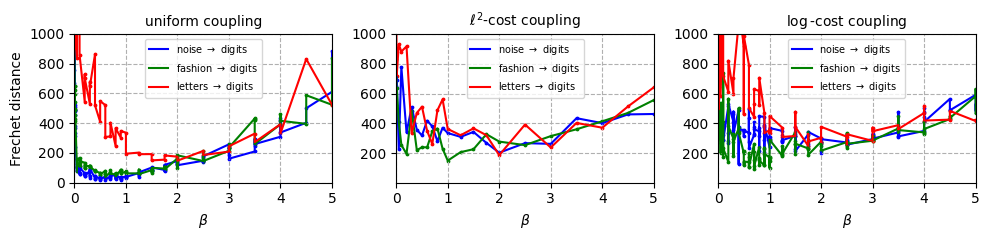

In [10]:


def get_plot(data, ax, label, title=('','',''),  xlim=[0, 2.5], ylim=[1,1000], color='blue', log=(False,False)):
    import pandas as pd
    import matplotlib.pyplot as plt
    df1 = pd.DataFrame(data[0])
    df1 = df1.sort_values(by='gamma')
    df2 = pd.DataFrame(data[1])
    df2 = df2.sort_values(by='gamma')
    df3 = pd.DataFrame(data[2])
    df3 = df3.sort_values(by='gamma')
    
    ax[0].plot(df1['gamma'], df1['fid_3'], color=color, label=label)
    ax[0].scatter(df1['gamma'], df1['fid_3'], color=color, s=3)
    ax[0].set_ylabel('Frechet distance')
    ax[0].set_xlabel(r'$\beta$')
    ax[0].set_xlim(xlim)
    ax[0].set_ylim(ylim)
    ax[0].grid(linestyle='--')
    ax[0].legend(fontsize=7,loc='upper center')
    ax[0].set_yticks([0, 200, 400, 600, 800,1000])
    ax[0].set_title(title[0], fontsize=10)
    if log[0]: ax[0].set_xscale('log')
    if log[1]: ax[0].set_yscale('log')

    ax[1].plot(df2['gamma'], df2['fid_3'], color=color, label=label)
    ax[1].scatter(df2['gamma'], df2['fid_3'], color=color, s=3)
    ax[1].set_ylabel('')
    ax[1].set_xlabel(r'$\beta$')
    ax[1].set_xlim(xlim)
    ax[1].set_ylim(ylim)
    ax[1].grid(linestyle='--')
    ax[1].legend(fontsize=7,loc='upper center')
    ax[1].set_title(title[1], fontsize=10)
    if log[0]: ax[1].set_xscale('log')
    if log[1]: ax[1].set_yscale('log')

    ax[2].plot(df3['gamma'], df3['fid_3'], color=color, label=label)
    ax[2].scatter(df3['gamma'], df3['fid_3'], color=color, s=3)
    ax[2].set_ylabel('')
    ax[2].set_xlabel(r'$\beta$')
    ax[2].set_xlim(xlim)
    ax[2].set_ylim(ylim)
    ax[2].legend(fontsize=7,loc='upper center')
    ax[2].grid(linestyle='--')
    ax[2].set_title(title[2], fontsize=10)
    if log[0]: ax[2].set_xscale('log')
    if log[1]: ax[2].set_yscale('log')

fig, ax = plt.subplots(1, 3, figsize=(10, 2.5))
get_plot(data[0], ax, label=r'noise $\to$ digits', color='blue',  xlim=[0,5])
get_plot(data[1], ax, label=r'fashion $\to$ digits',  color='green', xlim=[0,5])
get_plot(data[2], ax, label=r'letters $\to$ digits', title= ('uniform coupling', '$\ell^2$-cost coupling', '$\log$-cost coupling'), color='red', xlim=[0,5])
plt.tight_layout()
plt.show()

In [4]:
# tranpose of tuple

def transpose(t): 
    return tuple(zip(*t))



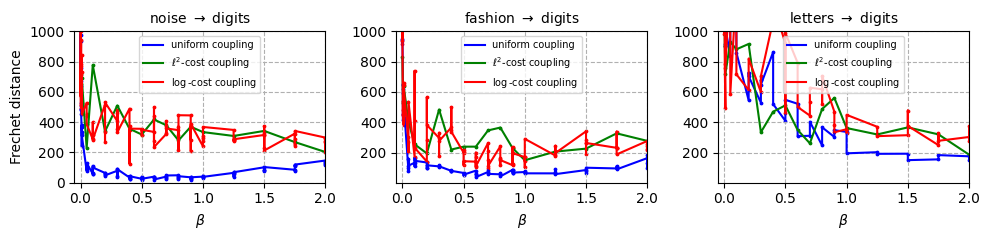

In [5]:
data_T = transpose(data)
fig, ax = plt.subplots(1, 3, figsize=(10, 2.5))
get_plot(data_T[0], ax, label=r'uniform coupling', xlim=[-0.05,2], color='blue')
get_plot(data_T[1], ax, label=r'$\ell^2$-cost coupling', xlim=[-0.05,2], color='green')
get_plot(data_T[2], ax,  label=r'$\log$-cost coupling',  title= (r'noise $\to$ digits', r'fashion $\to$ digits', r'letters $\to$ digits'), xlim=[-0.05,2], color='red')
plt.tight_layout()
plt.show()

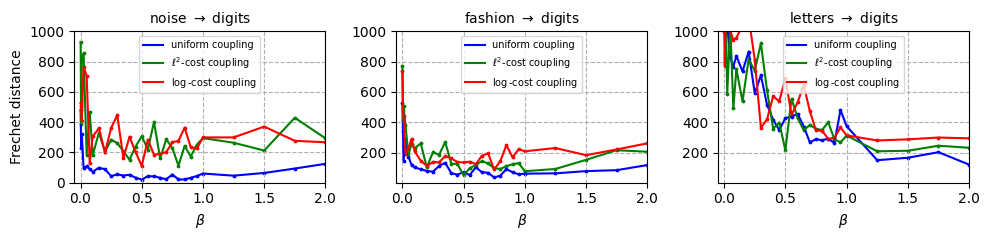

In [21]:
data_T = transpose(data)
fig, ax = plt.subplots(1, 3, figsize=(10, 2.5))
get_plot(data_T[0], ax, label=r'uniform coupling', xlim=[-0.05,2], color='blue')
get_plot(data_T[1], ax, label=r'$\ell^2$-cost coupling', xlim=[-0.05,2], color='green')
get_plot(data_T[2], ax,  label=r'$\log$-cost coupling',  title= (r'noise $\to$ digits', r'fashion $\to$ digits', r'letters $\to$ digits'), xlim=[-0.05,2], color='red')
plt.tight_layout()
plt.show()

In [31]:

def get_gammas(gamma, source='noise', coupling='uniform'):
    if source=='noise': i=0
    elif source=='fashion': i=1
    elif source=='emnist': i=2
    if coupling=='uniform': k=0
    elif coupling=='OTl2': k=1
    elif coupling=='OTlog': k=2
    fld_2=[]
    for d in data[i][k]:
        g = d['gamma']
        if g==gamma: 
            print(d['run'])
            fld_2.append(d['fid_2']) 
    fld = np.array(fld_2)
    fld_mean = np.mean(fld)
    fld_std = np.std(fld)
    return fld_mean-fld_std, fld_mean, fld_mean+fld_std

In [54]:


def get_fld(source, coupling):

    gammas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.25, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
    fld = {}
    fld['low'] = []
    fld['high']  = []
    fld['center'] = []
    fld['gamma'] = []
    for g in gammas:
        low, center, high = get_gammas(gamma=g, source=source, coupling=coupling)
        fld['gamma'].append(g)
        fld['low'].append(low)
        fld['center'].append(center)
        fld['high'].append(high)
    return fld

In [55]:
FLD = {}
FLD['uniform'] = {}
FLD['OTl2'] = {}
FLD['OTlog'] = {}

FLD['uniform']['noise'] = get_fld(source='noise', coupling='uniform')
FLD['uniform']['fashion'] = get_fld(source='fashion', coupling='uniform')
FLD['uniform']['emnist'] = get_fld(source='emnist', coupling='uniform')
FLD['OTlog']['noise'] = get_fld(source='noise', coupling='OTlog')
FLD['OTlog']['fashion'] = get_fld(source='fashion', coupling='OTlog')
FLD['OTlog']['emnist'] = get_fld(source='emnist', coupling='OTlog')
FLD['OTl2']['noise'] = get_fld(source='noise', coupling='OTl2')
FLD['OTl2']['fashion'] = get_fld(source='fashion', coupling='OTl2')
FLD['OTl2']['emnist'] = get_fld(source='emnist', coupling='OTl2')


noise_to_mnist_unet_uniform_coupling_ConstantThermostat_gamma_0.001__22h49s00_2024.05.18__36689758
noise_to_mnist_unet_uniform_coupling_ConstantThermostat_gamma_0.001__04h35s03_2024.05.20__36714363
noise_to_mnist_unet_uniform_coupling_ConstantThermostat_gamma_0.001__19h18s26_2024.05.18__36687531
noise_to_mnist_unet_uniform_coupling_ConstantThermostat_gamma_0.001__01h31s12_2024.05.20__36714157
noise_to_mnist_unet_uniform_coupling_ConstantThermostat_gamma_0.001__17h54s10_2024.05.19__36700681
noise_to_mnist_unet_uniform_coupling_ConstantThermostat_gamma_0.001__06h35s33_2024.05.20__36715629
noise_to_mnist_unet_uniform_coupling_ConstantThermostat_gamma_0.005__22h49s00_2024.05.18__36689759
noise_to_mnist_unet_uniform_coupling_ConstantThermostat_gamma_0.005__19h18s26_2024.05.18__36687532
noise_to_mnist_unet_uniform_coupling_ConstantThermostat_gamma_0.005__04h35s38_2024.05.20__36714364
noise_to_mnist_unet_uniform_coupling_ConstantThermostat_gamma_0.005__17h54s10_2024.05.19__36700682
noise_to_m

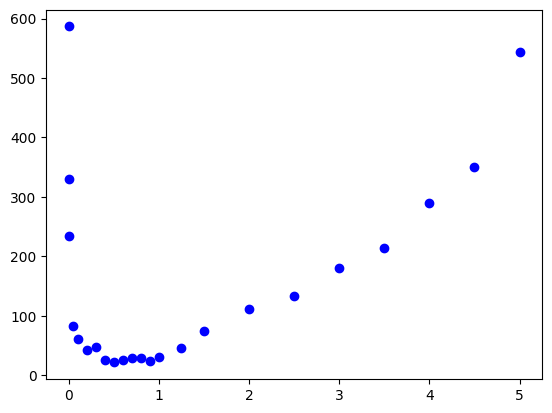

In [41]:
plt.scatter(gammas, data_central_noise_uniform, color='blue', label='noise $\to$ digits')

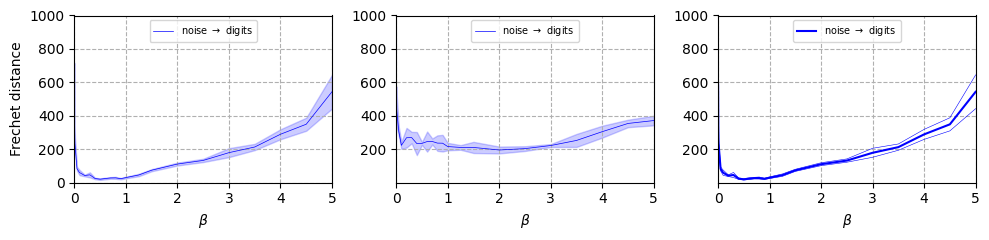

In [65]:


def get_plot(source, fld, ax, label, title=('','',''),  xlim=[0, 2.5], ylim=[1,1000], color='blue', log=(False,False)):
    import pandas as pd
    import matplotlib.pyplot as plt

    ax[0].plot(fld['uniform']['noise']['gamma'], fld['uniform']['noise']['high'], color=color, lw=0.0)
    ax[0].plot(fld['uniform']['noise']['gamma'], fld['uniform']['noise']['center'], color=color, label=label, lw=0.5)
    ax[0].plot(fld['uniform']['noise']['gamma'], fld['uniform']['noise']['low'], color=color, lw=0.0)
    ax[0].fill_between(fld['uniform']['noise']['gamma'], fld['uniform']['noise']['high'],fld['uniform']['noise']['low'],color=color,alpha=.2)    
    ax[0].set_ylabel('Frechet distance')
    ax[0].set_xlabel(r'$\beta$')
    ax[0].set_xlim(xlim)
    ax[0].set_ylim(ylim)
    ax[0].grid(linestyle='--')
    ax[0].legend(fontsize=7,loc='upper center')
    ax[0].set_yticks([0, 200, 400, 600, 800,1000])
    ax[0].set_title('uniform coupling', fontsize=10)
    if log[0]: ax[0].set_xscale('log')
    if log[1]: ax[0].set_yscale('log')

    ax[2].plot(fld['OTlog'][source]['gamma'], fld['OTlog'][source]['high'], color=color, lw=0.)
    ax[2].plot(fld['OTlog'][source]['gamma'], fld['OTlog'][source]['center'], color=color, label=label, lw=0.5)
    ax[2].plot(fld['OTlog'][source]['gamma'], fld['OTlog'][source]['low'], color=color, lw=0.)
    ax[2].fill_between(fld['OTlog'][source]['gamma'], fld['OTlog'][source]['high'],fld['OTlog']['noise']['low'],color=color,alpha=.2)    
    ax[1].set_ylabel('')
    ax[1].set_xlabel(r'$\beta$')
    ax[1].set_xlim(xlim)
    ax[1].set_ylim(ylim)
    ax[1].grid(linestyle='--')
    ax[1].legend(fontsize=7,loc='upper center')
    ax[1].set_title('OT Log-coupling', fontsize=10)
    if log[0]: ax[1].set_xscale('log')
    if log[1]: ax[1].set_yscale('log')

    ax[2].plot(fld['OTl2'][source]['gamma'], fld['OTl2'][source]['high'], color=color, lw=0.)
    ax[2].plot(fld['OTl2'][source]['gamma'], fld['OTl2'][source]['center'], color=color, label=label, lw=0.5)
    ax[2].plot(fld['OTl2'][source]['gamma'], fld['OTl2'][source]['low'], color=color, lw=0.)
    ax[2].fill_between(fld['OTl2'][source]['gamma'], fld['OTl2'][source]['high'],fld['OTl2']['noise']['low'],color=color,alpha=.2)    
    ax[2].set_ylabel('')
    ax[2].set_xlabel(r'$\beta$')
    ax[2].set_xlim(xlim)
    ax[2].set_ylim(ylim)
    ax[2].legend(fontsize=7,loc='upper center')
    ax[2].grid(linestyle='--')
    ax[2].set_title(r'OT $L^2$-coupling', fontsize=10)
    if log[0]: ax[2].set_xscale('log')
    if log[1]: ax[2].set_yscale('log')

fig, ax = plt.subplots(1, 3, figsize=(10, 2.5))
get_plot(FLD, ax, label=r'noise $\to$ digits', color='blue',  xlim=[0,4])
# get_plot(data[1], ax, label=r'fashion $\to$ digits',  color='green', xlim=[0,5])
# get_plot(data[2], ax, label=r'letters $\to$ digits', title= ('uniform coupling', '$\ell^2$-cost coupling', '$\log$-cost coupling'), color='red', xlim=[0,5])
plt.tight_layout()
plt.show()